DATA SCIENCE MINI PROJECT TASK 1


PROBLEM:

Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

GOAL:

Your goal is to develop a predictive model for whether an account will default next month, given demographics and historical data.You will developed the practical application of the model.

In [3]:
#Importing Libraries :
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.015527,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.123637,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now the data is in cleaned format

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
others                        0
university                    0
dtype: int64

In [8]:
#Let us take a look at target variable :
df['default payment next month']


0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [9]:
df.shape

(26664, 30)

In [11]:
#Let's Try To Find Out Correlation 
df.corr()['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_1                         0.325365
PAY_2                         0.263649
PAY_3                         0.238085
PAY_4                         0.219889
PAY_5                         0.204948
PAY_6                         0.190182
high school                   0.035943
EDUCATION                     0.034966
university                    0.031817
AGE                           0.014334
BILL_AMT6                    -0.006274
BILL_AMT5                    -0.006753
BILL_AMT4                    -0.011349
BILL_AMT2                    -0.014579
BILL_AMT3                    -0.014649
BILL_AMT1                    -0.020508
MARRIAGE                     -0.026030
SEX                          -0.039945
others                       -0.044411
graduate school              -0.049595
PAY_AMT4                     -0.054572
PAY_AMT6                     -0.054838
PAY_AMT5                     -0.056651
PAY_AMT3                     -0.058010
PAY_AMT2                 

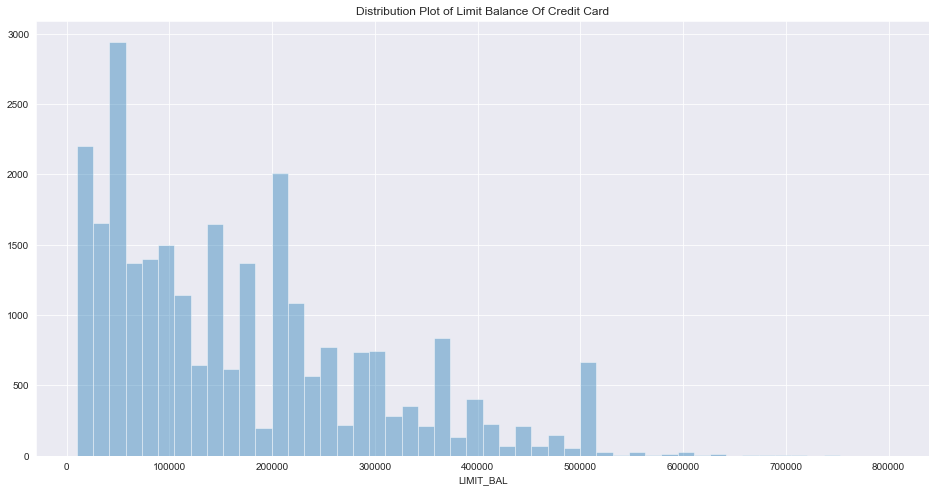

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))

plt.title('Distribution Plot of Limit Balance Of Credit Card')
sns.distplot(df['LIMIT_BAL'],kde=False)


In [13]:
#To Check Avreage limit balance of Credit Card
df['LIMIT_BAL'].mean()

167919.05490549054

In [14]:
#To Check Maximum limit balance of Credit Card
df['LIMIT_BAL'].max()

800000

In [15]:
#To Check Minimum limit balance of Credit Card 
df['LIMIT_BAL'].min()

10000

In [16]:
#AVEARGE age :
df['AGE'].mean()

35.50521302130213

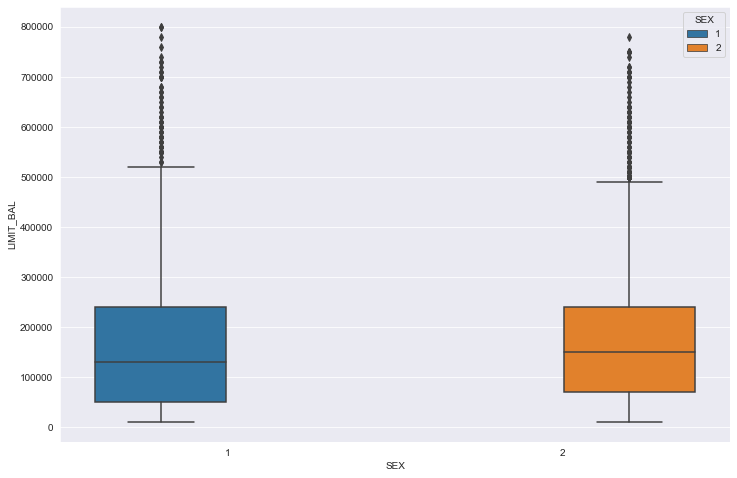

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')
#Assuming : 1- FEMALE , 2- MALE

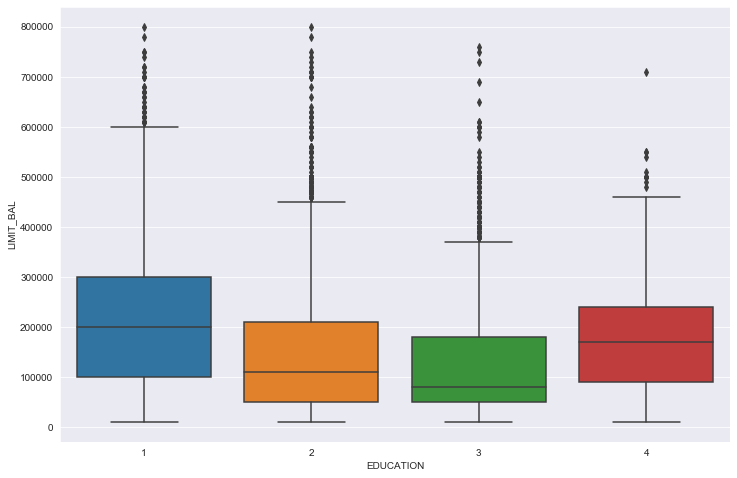

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',data=df)

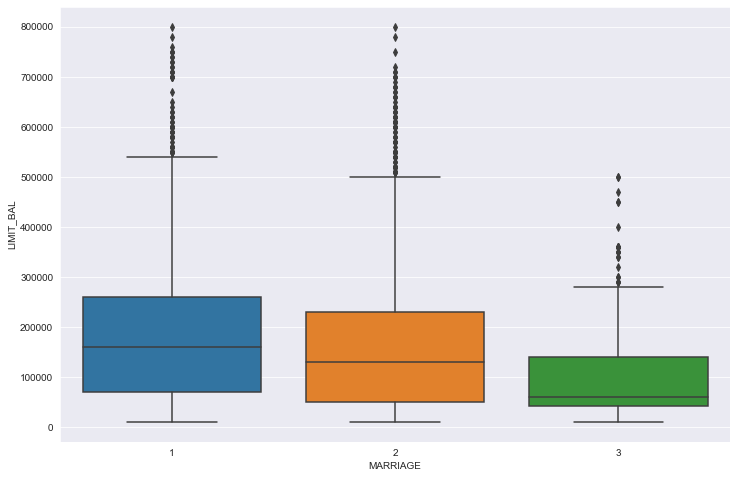

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',data=df)
#Let Us Assume : 1- Married , 2 - Single , 3- Others